In [2]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


# Import dataset file 

In [149]:
data=pd.read_csv('/home/tamizh3110/Downloads/cost-of-living.csv',header=0)

In [150]:
data.rename(columns={'Unnamed: 0':'Features/Countries'},inplace=True)
data.head(55)

,Features/Countries,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,...,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,...,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.00,4.51,3.58,4.22,...,3.56,3.67,3.06,8.20,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.00,1.69,1.02,0.84,...,1.50,1.10,2.37,4.00,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.00,2.82,1.53,2.11,...,1.50,2.20,3.06,4.00,7.26,5.57,5.59,4.97,2.81,2.70
5,Coke/Pepsi (0.33 liter bottle),0.76,0.64,0.61,2.66,0.64,2.49,0.29,1.18,0.37,...,0.48,0.69,0.70,2.47,2.07,1.91,1.79,1.99,0.32,0.71
6,Water (0.33 liter bottle),0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,...,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
7,"Milk (regular), (1 liter)",0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,...,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
8,Loaf of Fresh White Bread (500g),0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,...,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35
9,Eggs (regular) (12),1.18,1.62,1.51,2.02,1.11,2.87,1.04,1.47,1.03,...,1.21,1.00,1.63,2.65,3.32,2.85,2.59,2.79,1.02,1.59


In [151]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Columns: 161 entries, Features/Countries to Quito, Ecuador
dtypes: float64(160), object(1)
memory usage: 69.3+ KB
None


Drop columns with nan values

In [152]:
# drop columns with nan values
data.dropna()

,Features/Countries,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,...,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,...,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.00,4.51,3.58,4.22,...,3.56,3.67,3.06,8.20,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.00,1.69,1.02,0.84,...,1.50,1.10,2.37,4.00,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.00,2.82,1.53,2.11,...,1.50,2.20,3.06,4.00,7.26,5.57,5.59,4.97,2.81,2.70
5,Coke/Pepsi (0.33 liter bottle),0.76,0.64,0.61,2.66,0.64,2.49,0.29,1.18,0.37,...,0.48,0.69,0.70,2.47,2.07,1.91,1.79,1.99,0.32,0.71
6,Water (0.33 liter bottle),0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,...,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
7,"Milk (regular), (1 liter)",0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,...,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
8,Loaf of Fresh White Bread (500g),0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,...,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35
9,Eggs (regular) (12),1.18,1.62,1.51,2.02,1.11,2.87,1.04,1.47,1.03,...,1.21,1.00,1.63,2.65,3.32,2.85,2.59,2.79,1.02,1.59


In our dataset we can notice that with respect to countries we seem to find correlation between each of them

In [153]:
data.corr(method='pearson')

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
"Saint Petersburg, Russia",1.000000,0.994591,0.992885,0.974678,0.994256,0.978407,0.986334,0.989404,0.994240,0.995817,...,0.992920,0.993897,0.992960,0.931602,0.989569,0.918586,0.950830,0.907843,0.987507,0.995093
"Istanbul, Turkey",0.994591,1.000000,0.998096,0.952730,0.989128,0.964077,0.991457,0.984674,0.985827,0.994348,...,0.990246,0.989795,0.995722,0.929162,0.976233,0.906851,0.946219,0.890543,0.986314,0.987005
"Izmir, Turkey",0.992885,0.998096,1.000000,0.957592,0.993289,0.952577,0.997541,0.991896,0.982589,0.997639,...,0.995497,0.994748,0.999179,0.905866,0.980290,0.882891,0.926335,0.867759,0.993682,0.986317
"Helsinki, Finland",0.974678,0.952730,0.957592,1.000000,0.972899,0.962191,0.959737,0.978581,0.960472,0.972428,...,0.972737,0.975903,0.961572,0.861826,0.995373,0.880925,0.902077,0.890961,0.967460,0.965490
"Chisinau, Moldova",0.994256,0.989128,0.993289,0.972899,1.000000,0.953016,0.992496,0.997321,0.990848,0.998019,...,0.999128,0.999303,0.996688,0.895879,0.988682,0.872939,0.914602,0.859678,0.997705,0.995356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Melbourne, Australia",0.918586,0.906851,0.882891,0.880925,0.872939,0.971561,0.853151,0.855945,0.913964,0.882666,...,0.865918,0.870543,0.873427,0.980660,0.888768,1.000000,0.992545,0.993922,0.845885,0.900548
"Perth, Australia",0.950830,0.946219,0.926335,0.902077,0.914602,0.981194,0.900232,0.897968,0.947804,0.923061,...,0.909050,0.912024,0.918198,0.991161,0.917133,0.992545,1.000000,0.979461,0.892862,0.937106
"Sydney, Australia",0.907843,0.890543,0.867759,0.890961,0.859678,0.971359,0.840817,0.847781,0.895982,0.870922,...,0.854349,0.859884,0.858101,0.955988,0.890584,0.993922,0.979461,1.000000,0.833124,0.883338
"Alexandria, Egypt",0.987507,0.986314,0.993682,0.967460,0.997705,0.936092,0.996751,0.998630,0.980236,0.996993,...,0.999164,0.998584,0.997150,0.870473,0.985194,0.845885,0.892862,0.833124,1.000000,0.987073


We would like to consider the countries as our rows and the columns as our features which can explain the cost. Therefore we transpose our entire data

In [154]:
country_data=data.T

In [155]:
country_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Features/Countries,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641


In [156]:
new_header=country_data.iloc[0]
country_data=country_data[1:]
country_data.columns=new_header

In [157]:
country_data.head(5)

Features/Countries,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


# Understanding statistics of our data

Now let us just consider rent for 1 bedroom apartment in city centre and average monthly net salary(after tax) to understand how much of an expense is impacted by rent

In [158]:
country_data=country_data[['Apartment (1 bedroom) in City Centre','Average Monthly Net Salary (After Tax)']]

In [159]:
country_data

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
"Saint Petersburg, Russia",524.45,645.94
"Istanbul, Turkey",291.55,436
"Izmir, Turkey",212.22,392.07
"Helsinki, Finland",986.93,2382.56
"Chisinau, Moldova",244.49,286.95
...,...,...
"Melbourne, Australia",1134.86,2791.96
"Perth, Australia",897.5,2493.77
"Sydney, Australia",1568.39,3018.36
"Alexandria, Egypt",142.04,163.94


In [160]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Saint Petersburg, Russia to Quito, Ecuador
Data columns (total 2 columns):
Apartment (1 bedroom) in City Centre      160 non-null object
Average Monthly Net Salary (After Tax)    160 non-null object
dtypes: object(2)
memory usage: 3.8+ KB


In [161]:
country_data['Apartment (1 bedroom) in City Centre']=country_data['Apartment (1 bedroom) in City Centre'].astype('float64')
country_data['Average Monthly Net Salary (After Tax)']=country_data['Average Monthly Net Salary (After Tax)'].astype('float64')
country_data.describe()

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
count,160.000000,160.000000
mean,733.811250,1447.181938
std,549.634877,1257.350539
min,138.310000,163.940000
25%,330.952500,472.912500
50%,521.000000,859.610000
75%,988.742500,2373.027500
max,3131.060000,6532.210000


Now from the distribution we can clearly understand that the data is skewed to the right which can indicate that the mean is greater than the median of the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7d040a850>,
      dtype=object)

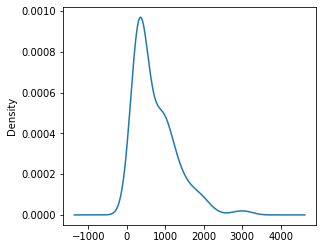

In [162]:
country_data['Apartment (1 bedroom) in City Centre'].plot(kind='density', subplots=True, layout=(1, 2),sharex=False,figsize=(10,4))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7d027b0d0>,
      dtype=object)

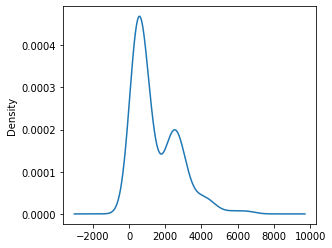

In [163]:
country_data['Average Monthly Net Salary (After Tax)'].plot(kind='density', subplots=True, layout=(1, 2),sharex=False,figsize=(10,4))

The box plots also indicate heavy outliers within the 1 bedroom rental data

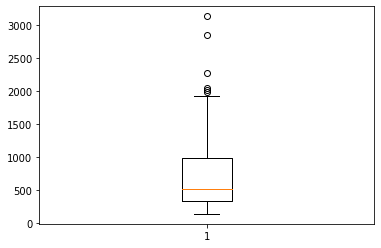

In [164]:
box_plot_apt=plt.boxplot(np.array((country_data['Apartment (1 bedroom) in City Centre'].values)))

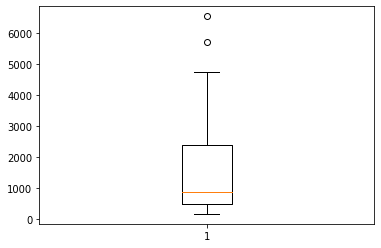

In [165]:
box_plot_sal=plt.boxplot(np.array((country_data['Average Monthly Net Salary (After Tax)'].values)))

Let us sort the data based on the average monthy salary to understand who has the highest salary income

In [166]:
country_data.sort_values(by='Average Monthly Net Salary (After Tax)',ascending=False)[0:20]

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
"San Francisco, CA, United States",3131.06,6532.21
"Zurich, Switzerland",1701.77,5714.80
"Seattle, WA, United States",1919.17,4741.65
"New York, NY, United States",2854.26,4665.46
"San Diego, CA, United States",1816.10,4293.13
"Dallas, TX, United States",1322.45,4202.00
"Boston, MA, United States",2275.95,4132.08
"Austin, TX, United States",1581.66,4097.92
"Los Angeles, CA, United States",1980.11,3968.48
"Chicago, IL, United States",1702.25,3717.02


Let us sort the data based on the apartment 1 bedroom rent in city centre to understand who has highest single bedroom rent(in city center)

In [167]:
country_data.sort_values(by='Apartment (1 bedroom) in City Centre',ascending=False)[0:20]

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax)
"San Francisco, CA, United States",3131.06,6532.21
"New York, NY, United States",2854.26,4665.46
"Boston, MA, United States",2275.95,4132.08
"Hong Kong, Hong Kong",2041.88,2387.66
"London, United Kingdom",2015.24,2756.93
"Los Angeles, CA, United States",1980.11,3968.48
"Seattle, WA, United States",1919.17,4741.65
"Singapore, Singapore",1859.98,2988.12
"San Diego, CA, United States",1816.10,4293.13
"Chicago, IL, United States",1702.25,3717.02


Based on the above information let us take the difference between net salary and rental cost sort them based on net gain/loss after rental costs

In [168]:
country_data['Net Salary after rent expenses']=np.array(country_data['Average Monthly Net Salary (After Tax)'].values)-np.array(country_data['Apartment (1 bedroom) in City Centre'].values)

In [169]:
country_data.sort_values(by=['Net Salary after rent expenses'],ascending=False)[0:20]

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax),Net Salary after rent expenses
"Zurich, Switzerland",1701.77,5714.80,4013.03
"San Francisco, CA, United States",3131.06,6532.21,3401.15
"Dallas, TX, United States",1322.45,4202.00,2879.55
"Seattle, WA, United States",1919.17,4741.65,2822.48
"Austin, TX, United States",1581.66,4097.92,2516.26
"San Diego, CA, United States",1816.10,4293.13,2477.03
"Houston, TX, United States",1258.81,3568.78,2309.97
"Las Vegas, NV, United States",992.86,3132.38,2139.52
"Calgary, Canada",833.74,2956.33,2122.59
"Phoenix, AZ, United States",1092.25,3113.47,2021.22


# Clear trend

We can clearly notice a new trend as Zurich, Switzerland takes the top spot in net gain after rental costs. Even though this does not consider currency conversion into aspects, in magnitude perspective we seem to find our new outlier takes the first rank spot.

In [170]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Saint Petersburg, Russia to Quito, Ecuador
Data columns (total 3 columns):
Apartment (1 bedroom) in City Centre      160 non-null float64
Average Monthly Net Salary (After Tax)    160 non-null float64
Net Salary after rent expenses            160 non-null float64
dtypes: float64(3)
memory usage: 5.0+ KB


In [171]:
country_data['Net Salary after rent expenses'].describe()

count     160.000000
mean      713.370688
std       790.499620
min      -194.310000
25%       143.640000
50%       351.500000
75%      1229.287500
max      4013.030000
Name: Net Salary after rent expenses, dtype: float64

In [172]:
country_data.corr(method='pearson')

Features/Countries,Apartment (1 bedroom) in City Centre,Average Monthly Net Salary (After Tax),Net Salary after rent expenses
Features/Countries,,,
Apartment (1 bedroom) in City Centre,1.000000,0.910265,0.752547
Average Monthly Net Salary (After Tax),0.910265,1.000000,0.957669
Net Salary after rent expenses,0.752547,0.957669,1.000000


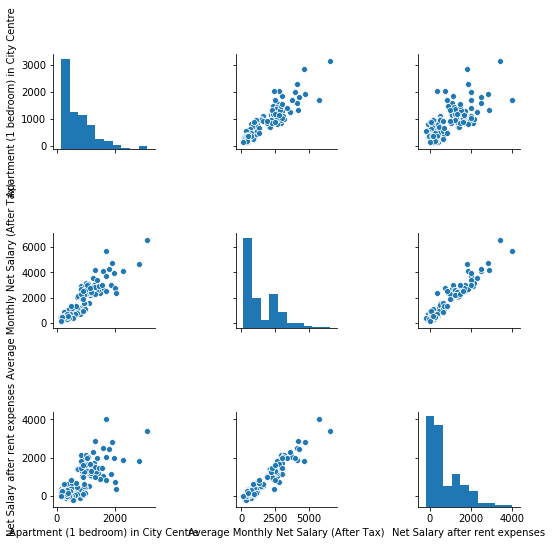

In [173]:
%config InlineBackend.figure_format = 'png'

sns.pairplot(country_data)

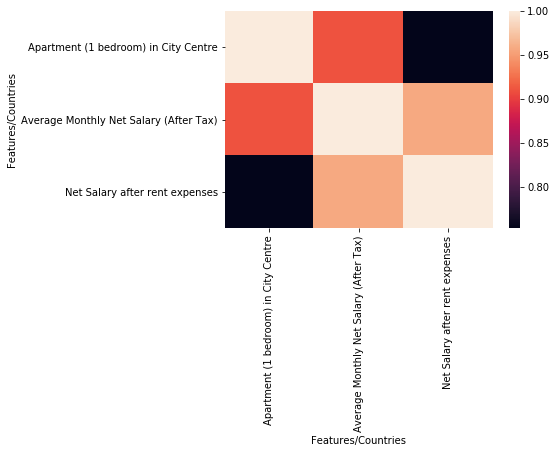

In [174]:
corr_matrix=country_data.corr()
sns.heatmap(corr_matrix)

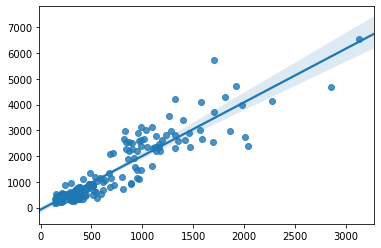

In [175]:
model=sns.regplot(country_data['Apartment (1 bedroom) in City Centre'].values,country_data['Average Monthly Net Salary (After Tax)'].values)
